<a href="https://colab.research.google.com/github/gyumin125/25-2-DIP-202302456/blob/main/HW/HW04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import os
imgpath = '/content/drive/MyDrive/DIP4E'

### Exercise 1
-적절한 gamma를 찾아서 영상을 개선시켜보자

In [52]:
f = plt.imread(imgpath+'/spine.tif')
print(f.shape,f.dtype)

(488, 373) uint8


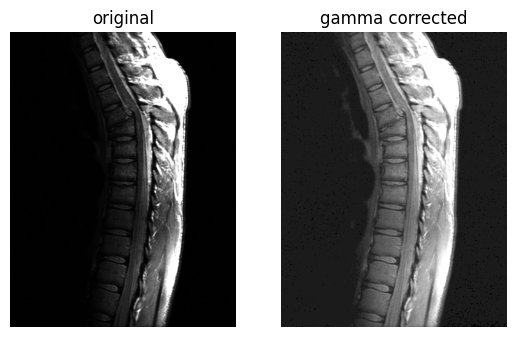

In [53]:
gamma=0.4
f_gc=np.power(f,gamma)
c = np.max(f)/np.max(f_gc)
f_gc = c * f_gc
plt.subplot(121)
plt.title('original')
plt.axis('off')
plt.imshow(f, cmap='gray')
plt.subplot(122)
plt.imshow(f_gc, cmap='gray')
plt.title('gamma corrected')
plt.axis('off')
plt.show()

### Exercise 2.
-local histogram equalization 수행과정에서 적절한 neighborhood size N을 찾아서 숨겨진 기호들을 모두 확인해보자.

In [54]:
f=plt.imread(imgpath+'/hidden-symbols.tif')
print(f.shape, f.dtype)

(256, 256) uint8


In [55]:
def histogram_equalization(image):
    histogram, bins = np.histogram(image.flatten(),bins=256, range=[0,256])
    cdf=histogram.cumsum()
    cdf_min = cdf.min()
    cdf_max= cdf.max()
    cdf_normalized = (cdf-cdf_min)*255 / (cdf_max - cdf_min)
    cdf_normalized = cdf_normalized.astype(np.uint8)
    equalized_image = cdf_normalized[image]
    return equalized_image

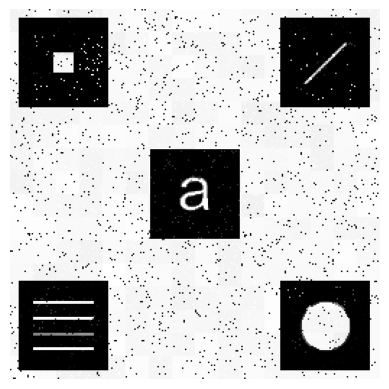

In [56]:
N=16
f_eq_local = np.zeros_like(f)
for x in np.arange(0,256,N):
  for y in np.arange(0,256,N):
    f_eq_local[x:x+N, y:y+N]= histogram_equalization(f[x:x+N, y:y+N])

plt.imshow(f_eq_local,vmin=0, vmax=255, cmap='gray')
plt.axis('off')
plt.show()

### Exercise 3
- 직접 찍은 사진을 grayscale image로 불러와서, kernel size를 3x3, 7x7, 15x15, 30x30으로 늘려가며 box kernel을 정의하여 LPF를 진행한 결과를 출력하고 kernel size에 따른 연산 시간의 차이를 확인하자.

In [57]:
import scipy.signal as signal
from skimage import io

In [58]:
f=io.imread('hufsdorm2.jpg',as_gray=True)
print(f.shape,f.dtype)

(4032, 2268) float64


In [59]:
import time

computation time =  0.8316478729248047  sec


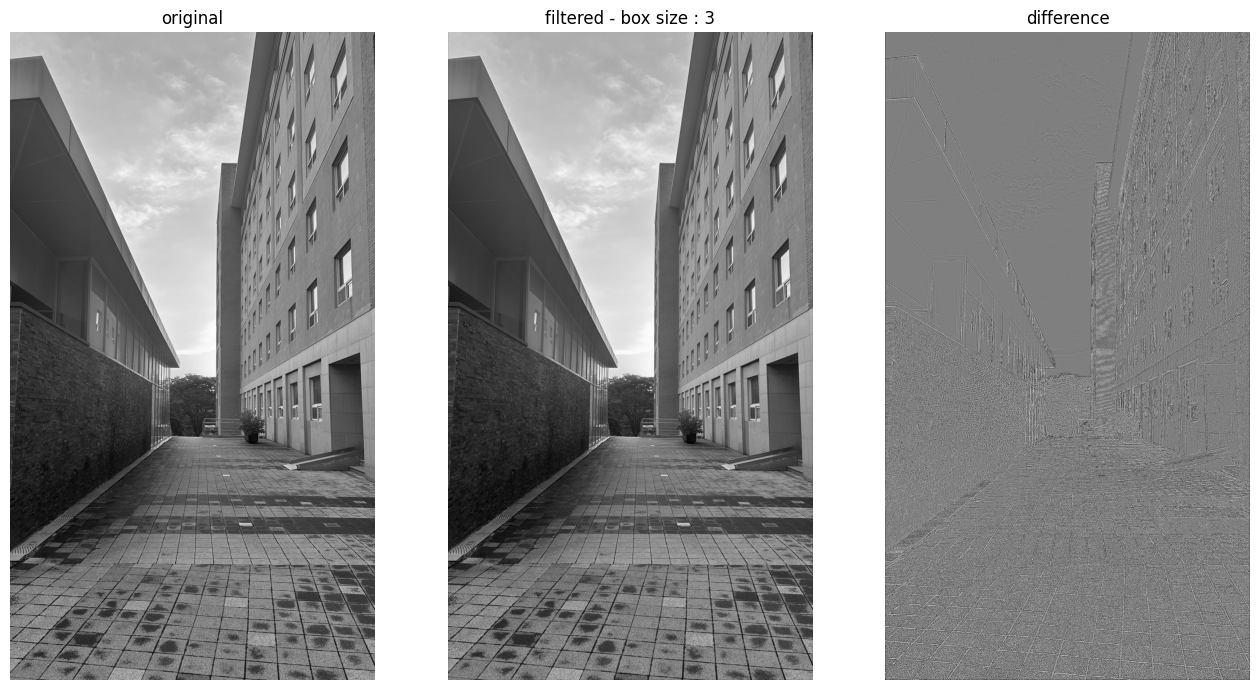

computation time =  1.4004199504852295  sec


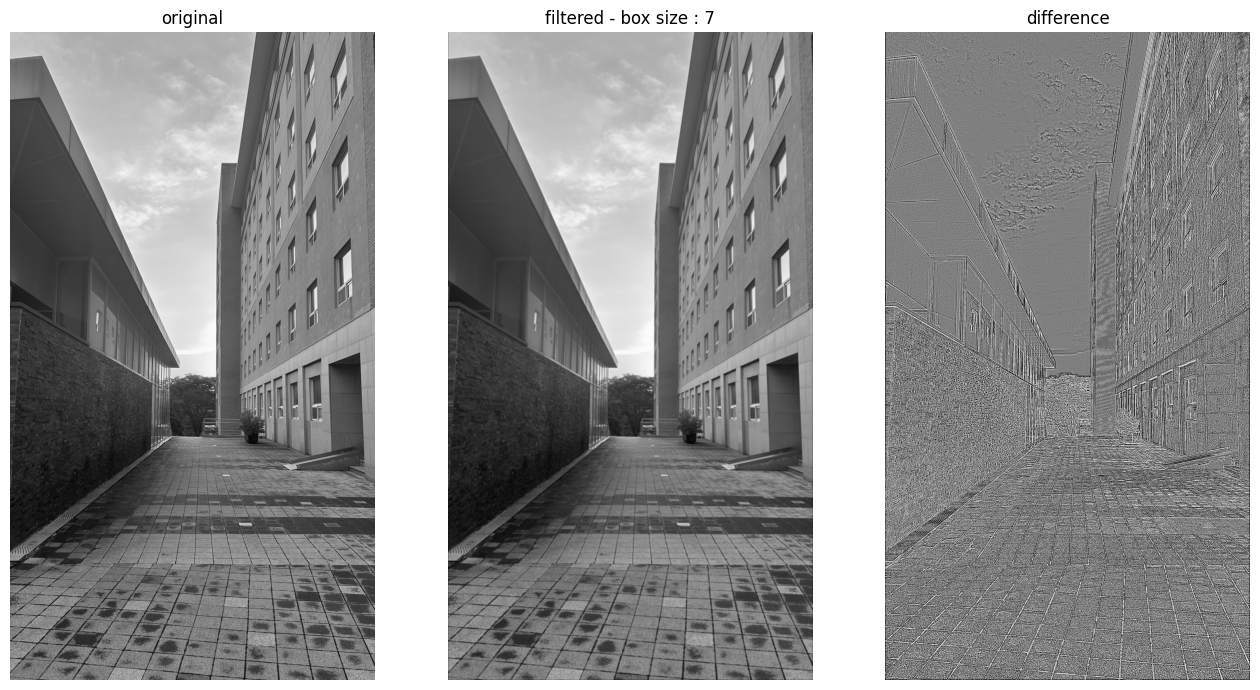

computation time =  5.078468084335327  sec


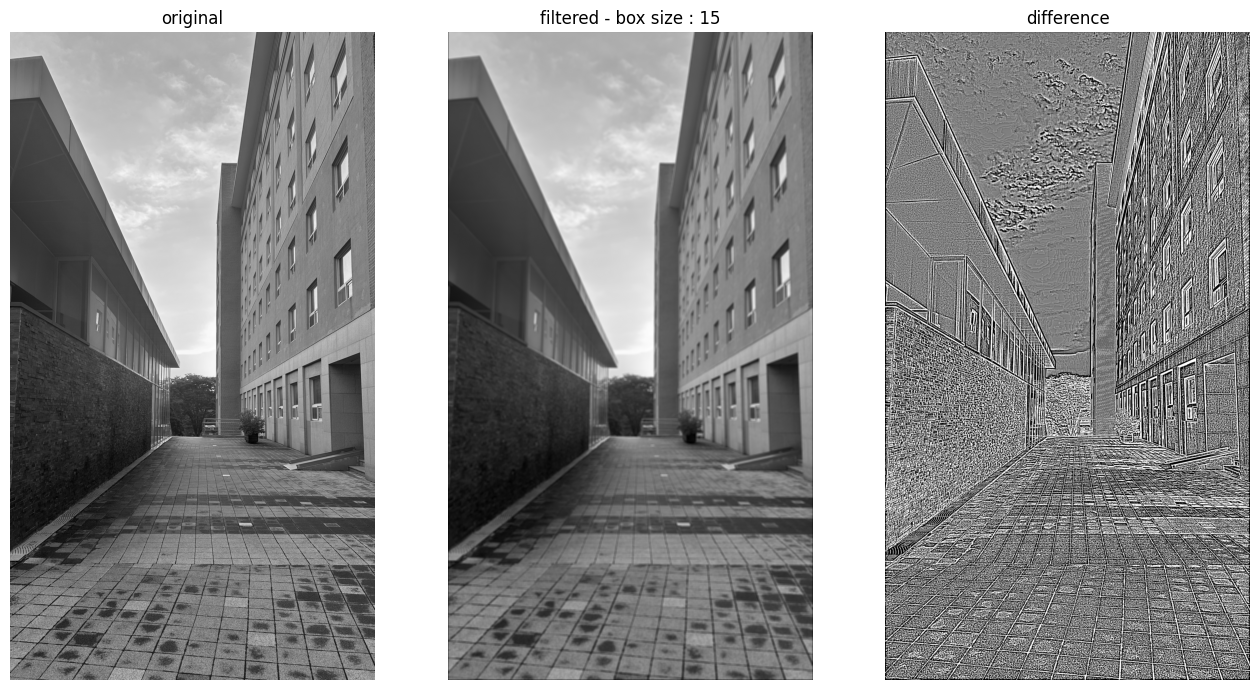

computation time =  20.765177965164185  sec


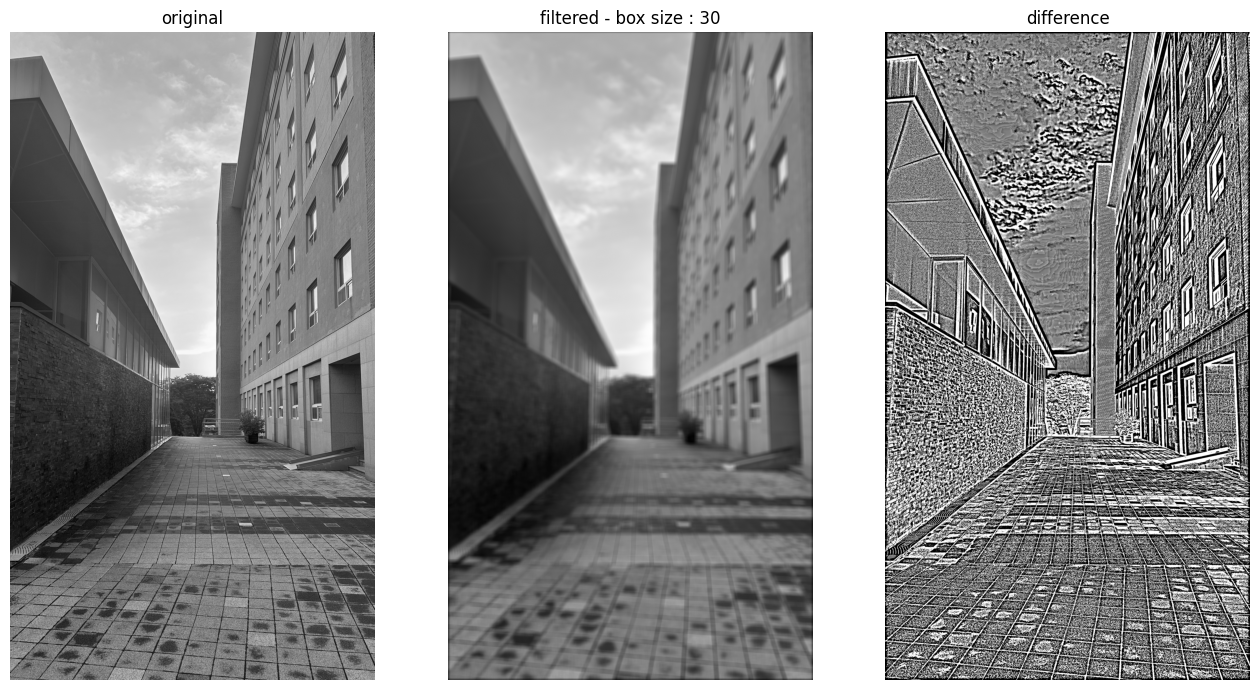

In [60]:
for N in np.array([3,7,15,30]):
  wb = np.ones((N,N))
  wb=wb/np.sum(wb)
  s0=time.time()
  y_b = signal.convolve2d(f,wb,mode='same')
  compu_time = time.time()-s0
  print('computation time = ', compu_time, ' sec')
  plt.figure(figsize=(16,9))
  plt.subplot(1,3,1)
  plt.imshow(f,cmap='gray')
  plt.axis('off')
  plt.title('original')
  plt.subplot(1,3,2)
  plt.imshow(y_b,cmap='gray')
  plt.axis('off')
  plt.title(f'filtered - box size : {N}')
  plt.subplot(1,3,3)
  plt.imshow(y_b-f,cmap='gray',vmin=-.01,vmax=.01)
  plt.axis('off')
  plt.title('difference')
  plt.show()